# AVISO data in zarr

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyproj
from rasterio.transform import Affine

import matplotlib.pyplot as plt
import matplotlib.colors as cl

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo
crs = ccrs.PlateCarree()
import cmocean.cm as cm

from xgcm import Grid
from xhistogram.xarray import histogram
import warnings
warnings.filterwarnings("ignore")

import os
from glob import glob

import histlib.box as box
import histlib.aviso as aviso
import histlib.cstes as cstes
import histlib.diagnosis as diag
from histlib.cstes import labels, zarr_dir

/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(


- i=0,1 :  jobs=6, cores = 26 
- i=2,3 :  jobs=1, cores = 26 
- i=4 :    jobs=1, cores = 10
- i=5 :    jobs=1, cores = 26
- i=6 :    jobs=4, cores = 26

In [2]:
if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster(cores=56, processes=28, walltime='04:00:00')
    #cluster = PBSCluster(cores=7, processes=7, walltime='04:00:00')
    cluster = PBSCluster(cores=10, processes=10, walltime='04:00:00')
    w = cluster.scale(jobs=3)
else:
    from dask.distributed import Client, LocalCluster
    cluster = LocalCluster()

client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: http://10.148.1.64:8787/status,
Dashboard: http://10.148.1.64:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.1.64:48295,Workers: 0
Dashboard: http://10.148.1.64:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


#### Test 

In [3]:
i=0
l="gps_SARAL_2018"
ds_data = xr.open_zarr(cstes.zarr_dir+'/'+l+'.zarr').chunk({'obs':500, 'alti_time':-1, 'site_obs':-1}).persist()
#ds_data = ds_data.isel(obs=slice(47999, 48002))#.chunk({'obs':20, 'alti_time':-1, 'site_obs':-1}).persist()
print('1')

1


In [22]:
ds_data

<xarray.Dataset>
Dimensions:                                       (obs: 138366, alti_time: 211,
                                                   alti_time_mid: 210,
                                                   box_y: 80, box_x: 120,
                                                   site_obs: 1489)
Coordinates: (12/19)
    alti_lat                                      (obs, alti_time) float64 dask.array<chunksize=(500, 211), meta=np.ndarray>
    alti_lon                                      (obs, alti_time) float64 dask.array<chunksize=(500, 211), meta=np.ndarray>
  * alti_time                                     (alti_time) int64 0 1 ... 210
    alti_time_                                    (obs, alti_time) datetime64[ns] dask.array<chunksize=(500, 211), meta=np.ndarray>
  * alti_time_mid                                 (alti_time_mid) float64 0.5...
    alti_x                                        (obs, alti_time) float64 dask.array<chunksize=(500, 211), meta=np.ndarray>
    ...                                            ...
    drifter_time                                  (obs, site_obs) datetime64[ns] dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_x                                     (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                                     (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    lat                                           (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    lon                                           (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    time                                          (obs) datetime64[ns] dask.array<chunksize=(500,), meta=np.ndarray>
Dimensions without coordinates: obs, site_obs
Data variables: (12/68)
    __site_id                                     (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    __site_matchup_indice                         (obs) int32 dask.array<chunksize=(500,), meta=np.ndarray>
    __site_name                                   (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    alti___distance                               (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    alti___source                                 (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    alti___source_center_index                    (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    ...                                            ...
    drifter_typedeath                             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_ve                                    (obs, site_obs) float32 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vn                                    (obs, site_obs) float32 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vx                                    (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vy                                    (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    f                                             (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
Attributes:
    __id:                   CMEMS-L3-SLA-SARAL__gps
    __time_coverage_end:    2019-01-01T00:00:00
    __time_coverage_start:  2018-01-01T00:00:00

In [24]:
ds_data = ds_data.where(ds_data.alti___distance<2e5, drop=True)

In [25]:
ds_data

<xarray.Dataset>
Dimensions:                                       (obs: 126490, alti_time: 211,
                                                   alti_time_mid: 210,
                                                   box_y: 80, box_x: 120,
                                                   site_obs: 1489)
Coordinates: (12/19)
    alti_lat                                      (obs, alti_time) float64 dask.array<chunksize=(452, 211), meta=np.ndarray>
    alti_lon                                      (obs, alti_time) float64 dask.array<chunksize=(452, 211), meta=np.ndarray>
  * alti_time                                     (alti_time) int64 0 1 ... 210
    alti_time_                                    (obs, alti_time) datetime64[ns] dask.array<chunksize=(452, 211), meta=np.ndarray>
  * alti_time_mid                                 (alti_time_mid) float64 0.5...
    alti_x                                        (obs, alti_time) float64 dask.array<chunksize=(452, 211), meta=np.ndarray>
    ...                                            ...
    drifter_time                                  (obs, site_obs) datetime64[ns] dask.array<chunksize=(452, 1489), meta=np.ndarray>
    drifter_x                                     (obs, site_obs) float64 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    drifter_y                                     (obs, site_obs) float64 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    lat                                           (obs) float64 dask.array<chunksize=(452,), meta=np.ndarray>
    lon                                           (obs) float64 dask.array<chunksize=(452,), meta=np.ndarray>
    time                                          (obs) datetime64[ns] dask.array<chunksize=(452,), meta=np.ndarray>
Dimensions without coordinates: obs, site_obs
Data variables: (12/68)
    __site_id                                     (obs) object dask.array<chunksize=(452,), meta=np.ndarray>
    __site_matchup_indice                         (obs) float64 dask.array<chunksize=(452,), meta=np.ndarray>
    __site_name                                   (obs) object dask.array<chunksize=(452,), meta=np.ndarray>
    alti___distance                               (obs) float64 dask.array<chunksize=(452,), meta=np.ndarray>
    alti___source                                 (obs) object dask.array<chunksize=(452,), meta=np.ndarray>
    alti___source_center_index                    (obs) object dask.array<chunksize=(452,), meta=np.ndarray>
    ...                                            ...
    drifter_typedeath                             (obs, site_obs) float64 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    drifter_ve                                    (obs, site_obs) float32 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    drifter_vn                                    (obs, site_obs) float32 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    drifter_vx                                    (obs, site_obs) float64 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    drifter_vy                                    (obs, site_obs) float64 dask.array<chunksize=(452, 1489), meta=np.ndarray>
    f                                             (obs) float64 dask.array<chunksize=(452,), meta=np.ndarray>
Attributes:
    __id:                   CMEMS-L3-SLA-SARAL__gps
    __time_coverage_end:    2019-01-01T00:00:00
    __time_coverage_start:  2018-01-01T00:00:00

# Test on one obs -> no problem 

In [45]:
# to find pb obs with lon, lat
ds_data['obs'] = np.arange(ds_data.dims['obs'])
d = ds_data.where(ds_data.lon<-10.95, drop=True)
d = d.where(d.lon>-11.15, drop=True)
d = d.where(d.lat>71.55, drop=True)
d = d.where(d.lat<71.57, drop=True)
ds_obs=d.compute()

In [5]:
dso = ds_data.isel(obs=1000).compute()
dsp = ds_data.isel(obs=76996).compute()

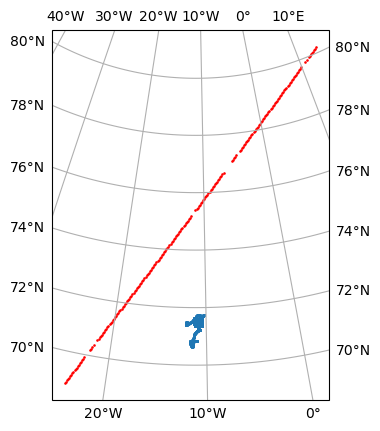

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.Orthographic(float(dso.lon), float(dso.lat)))
land_feature = cfeature.LAND
ax.scatter(dso.drifter_lon,dso.drifter_lat,cmap='viridis_r', marker='.',s=3, transform=crs, )
ax.scatter(dso.alti_lon,dso.alti_lat, color = 'r', cmap='viridis_r', marker='.',s=3, transform=crs, )

gl = ax.gridlines(draw_labels=True, dms=False, 
                 x_inline=False, y_inline=False, 
                )

In [9]:
dso

<xarray.Dataset>
Dimensions:                                       (alti_time: 211,
                                                   alti_time_mid: 210,
                                                   box_y: 80, box_x: 120,
                                                   site_obs: 1489)
Coordinates: (12/19)
    alti_lat                                      (alti_time) float64 49.44 ....
    alti_lon                                      (alti_time) float64 -144.3 ...
  * alti_time                                     (alti_time) int64 0 1 ... 210
    alti_time_                                    (alti_time) datetime64[ns] ...
  * alti_time_mid                                 (alti_time_mid) float64 0.5...
    alti_x                                        (alti_time) float64 -7.237e...
    ...                                            ...
    drifter_time                                  (site_obs) datetime64[ns] 2...
    drifter_x                                     (site_obs) float64 -1.703e+...
    drifter_y                                     (site_obs) float64 -1.628e+...
    lat                                           float64 57.07
    lon                                           float64 -145.1
    time                                          datetime64[ns] 2018-01-04T1...
Dimensions without coordinates: site_obs
Data variables: (12/68)
    __site_id                                     <U8 '62857970'
    __site_matchup_indice                         int32 744
    __site_name                                   <U8 '62857970'
    alti___distance                               float64 2.034e+05
    alti___source                                 <U45 'dt_global_alg_phy_l3_...
    alti___source_center_index                    <U5 '30403'
    ...                                            ...
    drifter_typedeath                             (site_obs) float64 1.0 ... 1.0
    drifter_ve                                    (site_obs) float32 0.2436 ....
    drifter_vn                                    (site_obs) float32 0.0801 ....
    drifter_vx                                    (site_obs) float64 0.05424 ...
    drifter_vy                                    (site_obs) float64 -0.2506 ...
    f                                             float64 0.0001224
Attributes:
    __id:                   CMEMS-L3-SLA-SARAL__gps
    __time_coverage_end:    2019-01-01T00:00:00
    __time_coverage_start:  2018-01-01T00:00:00

In [10]:
dsp

<xarray.Dataset>
Dimensions:                                       (alti_time: 211,
                                                   alti_time_mid: 210,
                                                   box_y: 80, box_x: 120,
                                                   site_obs: 1489)
Coordinates: (12/19)
    alti_lat                                      (alti_time) float64 80.19 ....
    alti_lon                                      (alti_time) float64 14.18 ....
  * alti_time                                     (alti_time) int64 0 1 ... 210
    alti_time_                                    (alti_time) datetime64[ns] ...
  * alti_time_mid                                 (alti_time_mid) float64 0.5...
    alti_x                                        (alti_time) float64 -8.49e+...
    ...                                            ...
    drifter_time                                  (site_obs) datetime64[ns] 2...
    drifter_x                                     (site_obs) float64 3.214e+0...
    drifter_y                                     (site_obs) float64 2.374e+0...
    lat                                           float64 71.56
    lon                                           float64 -11.11
    time                                          datetime64[ns] 2018-08-02T2...
Dimensions without coordinates: site_obs
Data variables: (12/68)
    __site_id                                     <U8 '61511850'
    __site_matchup_indice                         int32 744
    __site_name                                   <U8 '61511850'
    alti___distance                               float64 3.816e+05
    alti___source                                 <U45 'dt_global_alg_phy_l3_...
    alti___source_center_index                    <U5 '40573'
    ...                                            ...
    drifter_typedeath                             (site_obs) float64 1.0 ... 1.0
    drifter_ve                                    (site_obs) float32 -0.1622 ...
    drifter_vn                                    (site_obs) float32 -0.0908 ...
    drifter_vx                                    (site_obs) float64 0.1684 ....
    drifter_vy                                    (site_obs) float64 -0.07864...
    f                                             float64 0.0001384
Attributes:
    __id:                   CMEMS-L3-SLA-SARAL__gps
    __time_coverage_end:    2019-01-01T00:00:00
    __time_coverage_start:  2018-01-01T00:00:00

In [73]:
from histlib.aviso import load_aviso
def get_aviso_one_obs(ds_obs, dt=(-1, 2), only_matchup_time=True):
    """load aviso for one collocation"""
    dl = 0.25
    assert (ds_obs["box_lon"] <= 180).all(), "error : ds_obs in 0-360° lon coordinates"

    # -180-180 longitude boundary problem
    limite_lon = (
        (ds_obs.drifter_lon > 178).any()
        or (ds_obs.drifter_lon < -178).any()
        or (ds_obs.box_lon > 178).any()
        or (ds_obs.box_lon < -178).any()
    )

    if limite_lon:
        box_lon = cstes.lon_180_to_360(ds_obs.box_lon)
        drifter_lon = cstes.lon_180_to_360(ds_obs.drifter_lon)
        _alti_lon = cstes.lon_180_to_360(ds_obs.alti_lon.isel(alti_time=ds_obs.dims['alti_time']//2))  # only matchup

    else:
        box_lon = ds_obs["box_lon"]
        drifter_lon = ds_obs["drifter_lon"]
        _alti_lon = ds_obs["alti_lon"].isel(alti_time=ds_obs.dims['alti_time']//2)  # only matchup

    # matchup site
    site_matchup_indice = int(ds_obs.__site_matchup_indice.values)
    _drifter_lon = drifter_lon.isel(site_obs=site_matchup_indice).values
    _drifter_lat = ds_obs.drifter_lat.isel(site_obs=site_matchup_indice).values
    _drifter_time = ds_obs.drifter_time.isel(site_obs=site_matchup_indice).values

    # select eras only over the box/drifter trajectory
    lon_min = min(box_lon.min(), drifter_lon.min())
    lon_max = max(box_lon.max(), drifter_lon.max())
    lat_min = min(ds_obs.box_lat.min(), ds_obs.drifter_lat.min())
    lat_max = max(ds_obs.box_lat.max(), ds_obs.drifter_lat.max())

    # load data
    _drop = [
        "crs",
        "lat_bnds",
        "lon_bnds",
        "ugosa",
        "err_ugosa",
        "vgosa",
        "err_vgosa",
        "ugos",
        "vgos",
        "flag_ice",
        "tpa_correction",
        "nv",
    ]
    try:
        ds_aviso = load_aviso(
            ds_obs.time.values,
            dt,
            suffix="aviso_",
            to_360=limite_lon,
            rkwargs={"drop_variables": _drop},
            longitude=np.arange(lon_min - dl, lon_max + dl, dl),
            latitude=np.arange(lat_min - dl, lat_max + dl, dl),
            method="nearest",
            tolerance=dl,
        )  # aviso sla and err_sla around matchup_time
    except:
    
        assert False, (ds_obs.__site_id.values, ds_obs.time.values)
    # interpolate at drifter matchup position, for all drifter times
    try : 
        ds_drifter = (
            ds_aviso.drop_duplicates(['aviso_lon', 'aviso_lat']).interp(aviso_lon=_drifter_lon, aviso_lat=_drifter_lat)
            .drop(["aviso_lon", "aviso_lat"])
            .rename({v: "aviso_drifter_temp_" + v for v in ds_aviso})
        )
    
        # at alti matchup
        ds_alti = ds_aviso.drop_duplicates(['aviso_lon', 'aviso_lat']).interp(
            aviso_time=ds_obs.alti_time_.isel(alti_time=ds_obs.dims['alti_time']//2),
            aviso_lon=_alti_lon,
            aviso_lat=ds_obs.alti_lat.isel(alti_time=ds_obs.dims['alti_time']//2),
        )
        ds_alti = ds_alti.drop(list(ds_alti.coords.keys())).rename(
            {v: "aviso_alti_matchup_" + v for v in ds_aviso}
        )
    except:
        assert False, ('pb interpolate over drifter matchup' ,ds_obs.__site_id.values, ds_obs.time.values)

    return ds_alti

In [6]:
dp = aviso.get_aviso_one_obs(dsp, dt=(-12, 13), only_matchup_time=True)
do = aviso.get_aviso_one_obs(dso, dt=(-12, 13), only_matchup_time=True)

In [7]:
dp

<xarray.Dataset>
Dimensions:                        (site_obs: 1489, box_x: 120, box_y: 80,
                                    aviso_time: 25)
Coordinates:
  * box_x                          (box_x) float64 -3e+05 -2.95e+05 ... 2.95e+05
  * box_y                          (box_y) float64 -2e+05 -1.95e+05 ... 1.95e+05
Dimensions without coordinates: site_obs, aviso_time
Data variables: (12/34)
    aviso_traj_sla                 (site_obs) float64 nan nan nan ... nan nan
    aviso_traj_err_sla             (site_obs) float64 nan nan nan ... nan nan
    aviso_traj_adt                 (site_obs) float64 nan nan nan ... nan nan
    drifter_time                   (site_obs) datetime64[ns] 2018-07-02T21:00...
    drifter_x                      (site_obs) float64 3.214e+05 ... 3.479e+05
    drifter_y                      (site_obs) float64 2.374e+05 ... 3.088e+05
    ...                             ...
    aviso_alti_matchup_ggx_sla     float64 1.726e-06
    aviso_alti_matchup_ggy_sla     float64 -3.115e-06
    aviso_alti_matchup_ggx_adt     float64 3.843e-06
    aviso_alti_matchup_ggy_adt     float64 -2.093e-05
    aviso_time_                    (aviso_time) datetime64[ns] 2018-07-21 ......
    time                           datetime64[ns] 2018-08-02T21:00:00
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

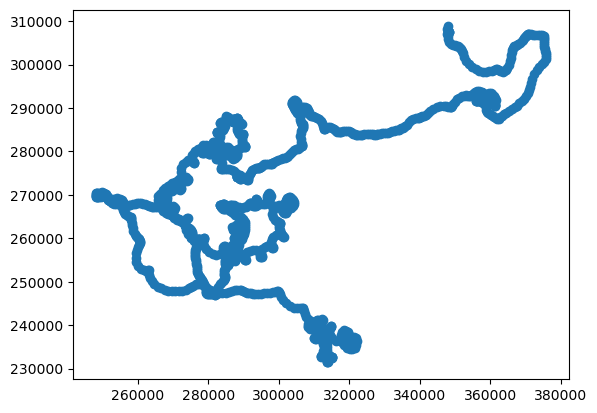

In [18]:
fig, ax= plt.subplots(1,1)
#dp.aviso_box_ggx_sla.plot(ax=ax)
ax.scatter(dp.drifter_x, dp.drifter_y)

In [11]:
do

<xarray.Dataset>
Dimensions:                        (site_obs: 1489, box_x: 120, box_y: 80,
                                    aviso_time: 25)
Coordinates:
  * box_x                          (box_x) float64 -3e+05 -2.95e+05 ... 2.95e+05
  * box_y                          (box_y) float64 -2e+05 -1.95e+05 ... 1.95e+05
Dimensions without coordinates: site_obs, aviso_time
Data variables: (12/34)
    aviso_traj_sla                 (site_obs) float64 nan nan nan ... nan nan
    aviso_traj_err_sla             (site_obs) float64 nan nan nan ... nan nan
    aviso_traj_adt                 (site_obs) float64 nan nan nan ... nan nan
    drifter_time                   (site_obs) datetime64[ns] 2017-12-04T15:00...
    drifter_x                      (site_obs) float64 -1.703e+05 ... 3.151e+05
    drifter_y                      (site_obs) float64 -1.628e+05 ... -1.755e+05
    ...                             ...
    aviso_alti_matchup_ggx_sla     float64 -1.011e-06
    aviso_alti_matchup_ggy_sla     float64 2.15e-07
    aviso_alti_matchup_ggx_adt     float64 1.598e-06
    aviso_alti_matchup_ggy_adt     float64 -1.853e-06
    aviso_time_                    (aviso_time) datetime64[ns] 2017-12-23 ......
    time                           datetime64[ns] 2018-01-04T15:00:00
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

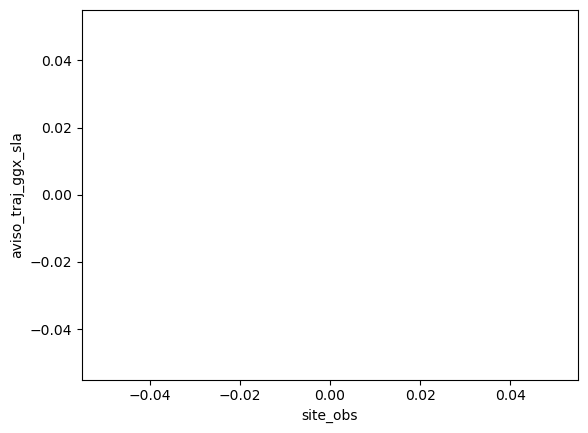

In [8]:
dp.aviso_traj_ggx_sla.plot()

# Test _concat on 3 obs -> no problem

In [4]:
ds = ds_data.isel(obs=slice(48000, 48003)).compute()

In [5]:
ds_aviso = aviso._concat_aviso(ds, dt=(-12, 13), only_matchup_time=True)

<xarray.DataArray 'obs' ()>
array(0)
Coordinates:
    lat      float64 6.238
    lon      float64 -137.4
    time     datetime64[ns] 2011-05-07T23:00:00
<xarray.DataArray 'obs' ()>
array(1)
Coordinates:
    lat      float64 -10.83
    lon      float64 174.4
    time     datetime64[ns] 2011-05-07T15:00:00
<xarray.DataArray 'obs' ()>
array(2)
Coordinates:
    lat      float64 14.15
    lon      float64 -167.2
    time     datetime64[ns] 2011-05-07T13:00:00


# Test compute_aviso_sla on 1000 obs

In [5]:
ds = ds_data.isel(obs=slice(0, 1000))
ds

<xarray.Dataset>
Dimensions:                                       (obs: 1000, alti_time: 211,
                                                   alti_time_mid: 210,
                                                   box_y: 80, box_x: 120,
                                                   site_obs: 1489)
Coordinates: (12/19)
    alti_lat                                      (obs, alti_time) float64 dask.array<chunksize=(500, 211), meta=np.ndarray>
    alti_lon                                      (obs, alti_time) float64 dask.array<chunksize=(500, 211), meta=np.ndarray>
  * alti_time                                     (alti_time) int64 0 1 ... 210
    alti_time_                                    (obs, alti_time) datetime64[ns] dask.array<chunksize=(500, 211), meta=np.ndarray>
  * alti_time_mid                                 (alti_time_mid) float64 0.5...
    alti_x                                        (obs, alti_time) float64 dask.array<chunksize=(500, 211), meta=np.ndarray>
    ...                                            ...
    drifter_time                                  (obs, site_obs) datetime64[ns] dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_x                                     (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                                     (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    lat                                           (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    lon                                           (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    time                                          (obs) datetime64[ns] dask.array<chunksize=(500,), meta=np.ndarray>
Dimensions without coordinates: obs, site_obs
Data variables: (12/68)
    __site_id                                     (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    __site_matchup_indice                         (obs) int32 dask.array<chunksize=(500,), meta=np.ndarray>
    __site_name                                   (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    alti___distance                               (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    alti___source                                 (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    alti___source_center_index                    (obs) object dask.array<chunksize=(500,), meta=np.ndarray>
    ...                                            ...
    drifter_typedeath                             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_ve                                    (obs, site_obs) float32 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vn                                    (obs, site_obs) float32 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vx                                    (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vy                                    (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    f                                             (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
Attributes:
    __id:                   CMEMS-L3-SLA-Jason-2__argos
    __time_coverage_end:    2012-01-01T00:00:00
    __time_coverage_start:  2011-01-01T00:00:00

In [6]:
ds_aviso = aviso.compute_aviso_sla(ds, dt=(-12, 13))

In [8]:
do = ds_aviso.isel(obs=0).compute()

In [9]:
do

<xarray.Dataset>
Dimensions:                        (box_x: 120, box_y: 80, site_obs: 1489,
                                    aviso_time: 25)
Coordinates:
  * box_x                          (box_x) float64 -3e+05 -2.95e+05 ... 2.95e+05
  * box_y                          (box_y) float64 -2e+05 -1.95e+05 ... 1.95e+05
    aviso_time_                    (aviso_time) datetime64[ns] 2010-12-21 ......
    time                           datetime64[ns] 2011-01-02T08:00:00
Dimensions without coordinates: site_obs, aviso_time
Data variables: (12/32)
    aviso_traj_sla                 (site_obs) float64 nan nan nan ... nan nan
    aviso_traj_err_sla             (site_obs) float64 nan nan nan ... nan nan
    aviso_traj_adt                 (site_obs) float64 nan nan nan ... nan nan
    drifter_time                   (site_obs) datetime64[ns] 2010-12-02T18:00...
    drifter_x                      (site_obs) float64 -3.092e+05 ... nan
    drifter_y                      (site_obs) float64 -1.287e+05 ... nan
    ...                             ...
    aviso_alti_matchup_err_sla     float64 0.009951
    aviso_alti_matchup_adt         float64 -0.7471
    aviso_alti_matchup_ggx_sla     float64 7.844e-06
    aviso_alti_matchup_ggy_sla     float64 -8.277e-07
    aviso_alti_matchup_ggx_adt     float64 -1.022e-05
    aviso_alti_matchup_ggy_adt     float64 1.783e-05
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

## Open Test

In [3]:
i=1
l=labels[i]
ds_aviso_test = xr.open_zarr(cstes.zarr_dir+'/aviso_'+l+'.zarr').persist()


In [4]:
ds_aviso_test

<xarray.Dataset>
Dimensions:                             (obs: 73334, box_y: 40, box_x: 80,
                                         aviso_time: 3, site_obs: 1489)
Coordinates:
    aviso_time_                         (obs, aviso_time) datetime64[ns] dask.array<chunksize=(18334, 2), meta=np.ndarray>
  * box_x                               (box_x) float64 -2e+05 ... 1.95e+05
  * box_y                               (box_y) float64 -1e+05 ... 9.5e+04
    time                                (obs) datetime64[ns] dask.array<chunksize=(36667,), meta=np.ndarray>
Dimensions without coordinates: obs, aviso_time, site_obs
Data variables: (12/31)
    aviso_alti_matchup_adt              (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_adt_g_grad_x     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_adt_g_grad_y     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_err_sla          (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_x         (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_y         (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    ...                                  ...
    aviso_traj_g_grad_x                 (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_traj_g_grad_y                 (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_traj_sla                      (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_time                        (obs, site_obs) datetime64[ns] dask.array<chunksize=(2292, 94), meta=np.ndarray>
    drifter_x                           (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                           (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

In [5]:
ds_aviso_test.aviso_drifter_matchup_g_grad_x.attrs['long_name']=ds_aviso_test.aviso_drifter_matchup_g_grad_x.attrs['long_name'].replace(' matchup', 'matchup')

In [6]:
ds_aviso_test.aviso_drifter_matchup_g_grad_x.attrs['long_name']

'$g\\partial_x\\eta_{driftermatchup}$'

#pb attrs
i=6
l=labels[i]
ds_aviso_test = xr.open_zarr(cstes.zarr_dir+'/aviso_'+l+'.zarr').persist()
for v in ds_aviso_test:
     if 'matchup' in v:
            ds_aviso_test[v].attrs['long_name']=ds_aviso_test[v].attrs['long_name'].replace(' matchup', 'matchup')
zarr = os.path.join(zarr_dir, "aviso_"+l+".zarr")
ds_aviso_test.to_zarr(zarr, mode="w")
print(f"aviso {l} storred in {zarr}")

In [11]:
ds_aviso_test

<xarray.Dataset>
Dimensions:                             (obs: 73334, box_y: 40, box_x: 80,
                                         aviso_time: 3, site_obs: 1489)
Coordinates:
    aviso_time_                         (obs, aviso_time) datetime64[ns] dask.array<chunksize=(18334, 2), meta=np.ndarray>
  * box_x                               (box_x) float64 -2e+05 ... 1.95e+05
  * box_y                               (box_y) float64 -1e+05 ... 9.5e+04
    time                                (obs) datetime64[ns] dask.array<chunksize=(36667,), meta=np.ndarray>
Dimensions without coordinates: obs, aviso_time, site_obs
Data variables: (12/31)
    aviso_alti_matchup_adt              (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_adt_g_grad_x     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_adt_g_grad_y     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_err_sla          (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_x         (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_y         (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    ...                                  ...
    aviso_traj_g_grad_x                 (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_traj_g_grad_y                 (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_traj_sla                      (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_time                        (obs, site_obs) datetime64[ns] dask.array<chunksize=(2292, 94), meta=np.ndarray>
    drifter_x                           (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                           (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

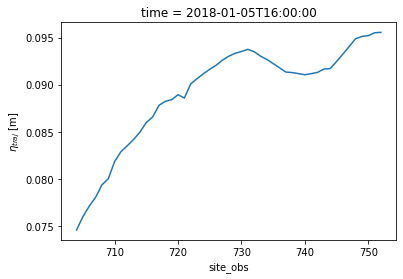

In [9]:
ds_aviso_test.isel(obs=0).aviso_traj_sla.plot()

In [10]:
ds_aviso_test

<xarray.Dataset>
Dimensions:                         (obs: 12077, box_y: 40, box_x: 80,
                                     aviso_time: 3, site_obs: 1489)
Coordinates:
    aviso_time_                     (obs, aviso_time) datetime64[ns] dask.array<chunksize=(6039, 3), meta=np.ndarray>
  * box_x                           (box_x) float64 -2e+05 ... 1.95e+05
  * box_y                           (box_y) float64 -1e+05 -9.5e+04 ... 9.5e+04
    time                            (obs) datetime64[ns] dask.array<chunksize=(12077,), meta=np.ndarray>
Dimensions without coordinates: obs, aviso_time, site_obs
Data variables: (12/19)
    aviso_alti_matchup_err_sla      (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_x     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_y     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_sla          (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_box_err_sla               (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>
    aviso_box_g_grad_x              (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>
    ...                              ...
    aviso_traj_g_grad_x             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_traj_g_grad_y             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_traj_sla                  (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_time                    (obs, site_obs) datetime64[ns] dask.array<chunksize=(755, 187), meta=np.ndarray>
    drifter_x                       (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                       (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

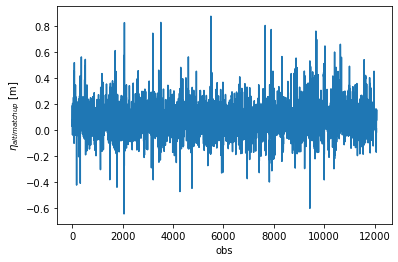

In [11]:
ds_aviso_test.aviso_alti_matchup_sla.plot()

In [26]:
cluster.close()

In [5]:
[l for l in labels if not os.path.isdir(os.path.join(zarr_dir, "aviso_"+l+".zarr"))]

['argos_Jason-2_2011',
 'argos_Jason-2_2010',
 'gps_Cryosat-2_2010',
 'argos_Cryosat-2_2010',
 'argos_Jason-2_2009',
 'argos_Jason-2_2008']